# Calories Burnt Prediction



## Data Preprocessing

### Import Libraries

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [188]:
dataset_1 = pd.read_csv('calories.csv')
dataset_2 = pd.read_csv('exercise.csv')

## Print first 15 rows of our dataset

In [189]:
dataset_1.head(15)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [190]:
dataset_2.head(15)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


### Number of rows and columns in our dataset

In [191]:
dataset_1.shape

(15000, 2)

In [192]:
dataset_2.shape

(15000, 8)

### Statistical Knowledge of our dataset

In [193]:
dataset_2.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


### Knowing datatype of our each column

In [194]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [195]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


# Scatterplot

## Scatterplot between height and weight

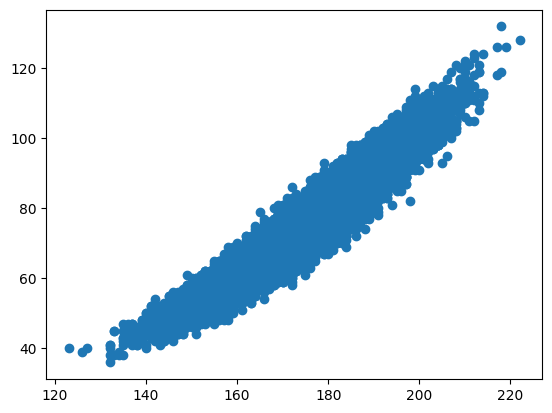

In [196]:
plt.scatter(dataset_2['Height'],dataset_2['Weight'])
plt.show()

## Concatenate

In [197]:
dataset_2 = pd.concat([dataset_2,dataset_1.Calories],axis=1)
print(dataset_2)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0        

## Scatterplot between Calories and duration

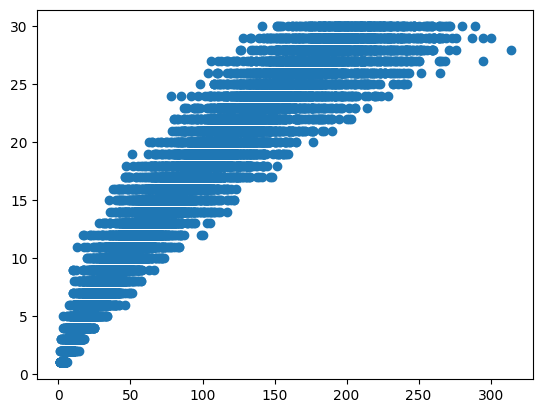

In [198]:
plt.scatter(dataset_2['Calories'],dataset_2['Duration'])
plt.show()

## Scatterplot between Calories and Age

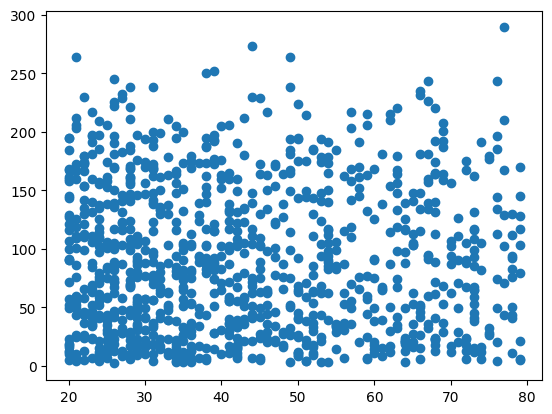

In [199]:
plt.scatter(dataset_2.sample(1000)['Age'],dataset_2.sample(1000)['Calories'])
plt.show()

## Scatterplot between Calories and Weight

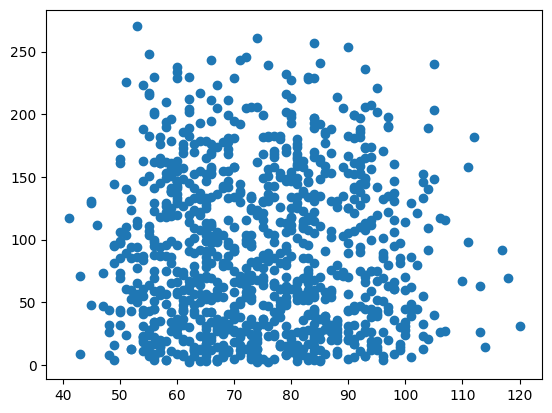

In [200]:
plt.scatter(dataset_2.sample(1000)['Weight'],dataset_2.sample(1000)['Calories'])
plt.show()

## Scatterplot between Calories and Height

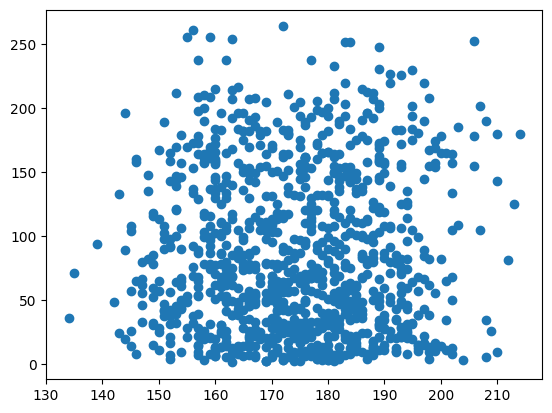

In [201]:
plt.scatter(dataset_2.sample(1000)['Height'],dataset_2.sample(1000)['Calories'])
plt.show()

# HeatMap

## Data Visualization tool

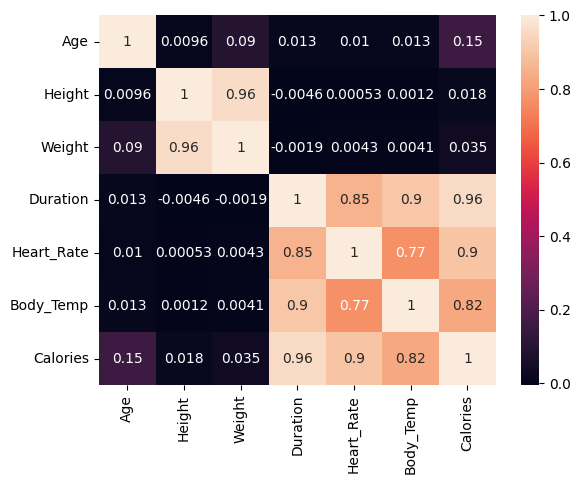

In [202]:
dataset_2 = dataset_2.drop(['Gender','User_ID'],axis=1)
sns.heatmap(dataset_2.corr(),annot=True)
plt.show()

## Remove certain highly correlated featurs

In [204]:
dataset_2 = dataset_2.drop(['Weight','Duration'],axis=1)

# Model Training

In [205]:
y = dataset_1['Calories'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset_2,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

# Predicting Results

In [206]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 85. 185. 139. ... 173.  16.  80.]


In [207]:
print(y_test)

[ 85. 185. 139. ... 173.  16.  80.]


# Evaluation

## Mean_Squared_Error

In [208]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.036659999999999866